資料預處理  (ML最花費時間的地方)
1. 資料蒐集
2. 資料擷取
3. 知識轉換
4. 智慧生成

機器學習類別  
1. 監督式學習 
    1. 意義: 提供機器學習的資料稱為"特徵值" 作為答案的資料稱為"目標值"。
    2. 依照目標值不同 又分為兩類
        1. 分類: 目標值不是連續值 ex 客戶可否貸款
        2. 回歸: 目標是連續值 ex 客戶可以貸款多少金額
    3. 常見方法: K近鄰 單純貝氏分類 決策樹<br>
<br>
2. 非監督式學習
    1. 意義: 沒有告訴機器正確答案是什麼 讓機器自己從資料中發現模式
    2. 常見方法: K-means DBSCAN


In [48]:
# K-means
from sklearn.cluster import KMeans
import pandas as pd


df = pd.read_csv("Yt_tearice_customer.csv", encoding="utf-8")
df

,Gender,Age,Income(K),CPI
0,女,74,38,81
1,女,51,71,91
2,女,30,65,10
3,女,88,49,17
4,女,55,48,70
...,...,...,...,...
195,男,86,84,82
196,男,59,52,30
197,女,63,29,61
198,男,67,80,9


In [49]:
dict1 = {"男":"Male", "女":"Female"}
df["Gender"].replace(dict1, inplace=True)


gender = pd.get_dummies(df["Gender"])
df = pd.concat([df, gender], axis=1)
df = df.drop(["Gender"], axis=1)
df

,Age,Income(K),CPI,Female,Male
0,74,38,81,1,0
1,51,71,91,1,0
2,30,65,10,1,0
3,88,49,17,1,0
4,55,48,70,1,0
...,...,...,...,...,...
195,86,84,82,0,1
196,59,52,30,0,1
197,63,29,61,1,0
198,67,80,9,0,1


In [50]:
# KMeans 分群

clu = KMeans(n_clusters=2)
# 自訂 分三類

clu.fit(df)

c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [51]:
# 貼標籤
clu.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0])

In [52]:
df["KM_label"] = clu.labels_
df

,Age,Income(K),CPI,Female,Male,KM_label
0,74,38,81,1,0,0
1,51,71,91,1,0,0
2,30,65,10,1,0,1
3,88,49,17,1,0,1
4,55,48,70,1,0,0
...,...,...,...,...,...,...
195,86,84,82,0,1,0
196,59,52,30,0,1,1
197,63,29,61,1,0,0
198,67,80,9,0,1,1


<Axes: >

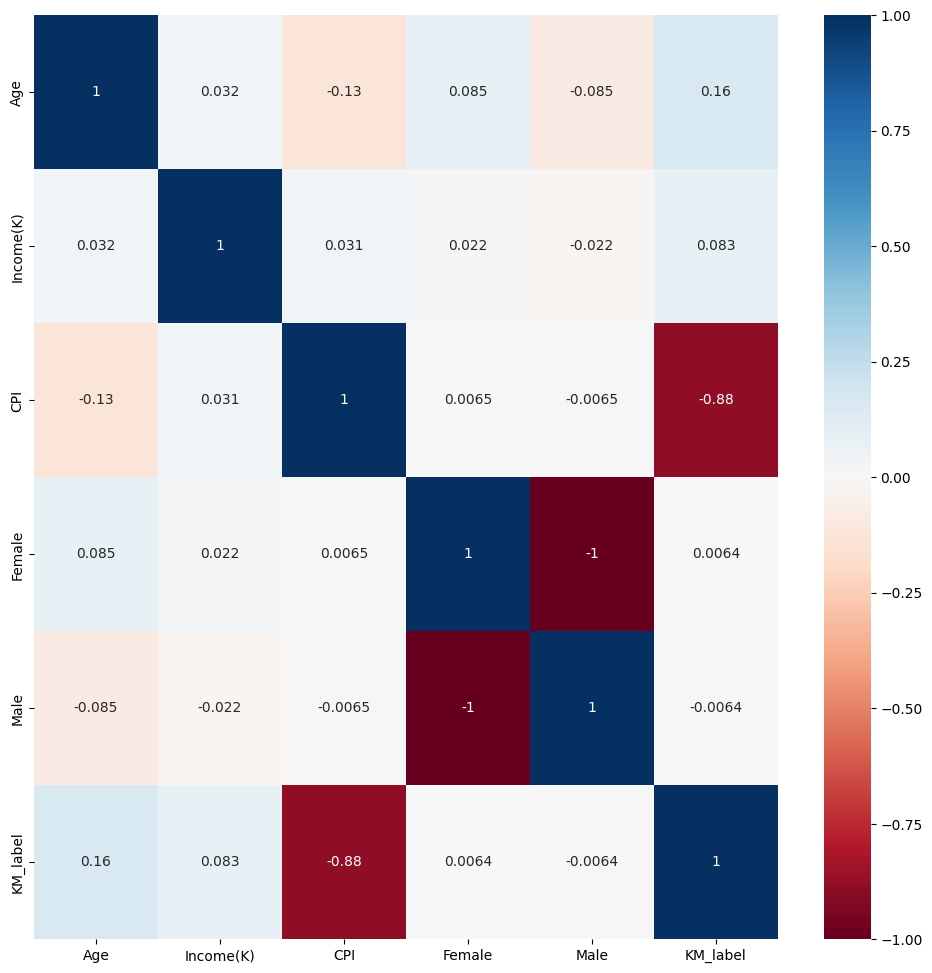

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.corr()
# 找出相關係數

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
# 熱度圖

In [54]:
# KMeans 自我評估效果
from sklearn.metrics import calinski_harabasz_score


for k in range(2,16):
    clu = KMeans(n_clusters=k, n_init="auto")
    clu.fit(df)
    score = calinski_harabasz_score(df, clu.labels_)
    print(f"群組數量:{k},評分:{score}")

# 得知 分2群 時，分數最高
# 再考量 分2群 時，能否達成資料分析的目的

群組數量:2,評分:111.70277006038481
群組數量:3,評分:96.51635907337074
群組數量:4,評分:86.66883854705407
群組數量:5,評分:85.71972791277202
群組數量:6,評分:90.1957327587255
群組數量:7,評分:97.18896030829163
群組數量:8,評分:100.8112789531854
群組數量:9,評分:96.05732437160906
群組數量:10,評分:93.60906496819332
群組數量:11,評分:92.30073093043957
群組數量:12,評分:86.28208268398132
群組數量:13,評分:89.95885257161858
群組數量:14,評分:80.76371706404936
群組數量:15,評分:83.48761222610112


K近鄰演算法

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data = []
for i in range(10):
    for j in range(1,501):
        data.append(plt.imread("D:/Learn/Machine_Learn/Yt_tearice_mnist500/mnist500/%d/%d_%d.bmp" %(i, i, j)))
# 將Yt_tearice_mnist500資料夾中的所有圖片，增加到 data list中

In [63]:
len(data)
# 確認使否讀取到5000張圖片

5000

In [74]:
xarray = np.array(data)
# 轉array

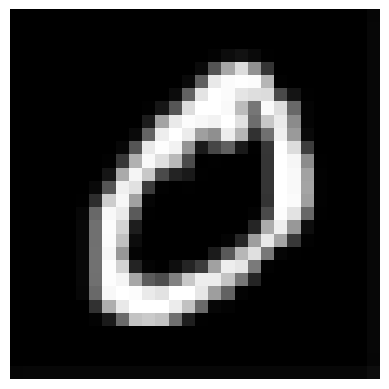

In [75]:
plt.axis("off")
# 不顯示xy軸座標

plt.imshow(x[0], cmap="gray")
# 讀取圖片確認一下

In [78]:
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] * 500
# 因上 x 中 有 500張0的圖片 500張1的圖片
# 製作 y 答案集

y.sort()
# 500 0 500 1 照訓序排列

yarray = np.array(y)
# 轉array

# 現已有 xarray 資料集 & yarray 答案集

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.2)

print(x_train.shape)
# 4000張 28*28像素 RGB圖片
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 28, 28, 3)
(1000, 28, 28, 3)
(4000,)
(1000,)


In [82]:
from sklearn.neighbors import KNeighborsClassifier


nei = KNeighborsClassifier(n_neighbors=5)
# n_neighbors 分幾群
# algorithm 使用何種演算法default auto 通常也使用auto
# weight 權重 : uniform 權重相同default / distance 資料與樣本越近權重越大 / 自定義

In [85]:
# nei.fit(x_train, y_train)
# 錯誤，因為只能只用二維資料

nei.fit(x_train.reshape(4000, -1), y_train)
# reshape (有多少筆資料, -1自動計算降維)

nei.fit(x_train.reshape(4000, -1), y_train)
# 將資料帶入模型訓練

pre = nei.predict(x_test.reshape(1000, -1))
pre

array([6, 3, 6, 7, 1, 3, 4, 9, 5, 1, 3, 8, 5, 0, 6, 9, 6, 4, 9, 0, 7, 7,
       4, 7, 6, 4, 0, 4, 4, 0, 4, 2, 7, 1, 4, 2, 3, 5, 3, 9, 4, 4, 2, 8,
       3, 0, 2, 1, 2, 3, 8, 1, 8, 3, 6, 7, 1, 5, 2, 4, 7, 6, 8, 8, 3, 2,
       6, 6, 4, 1, 3, 0, 4, 1, 9, 2, 0, 6, 1, 9, 2, 5, 4, 7, 2, 7, 2, 8,
       5, 9, 4, 7, 2, 3, 8, 6, 8, 9, 5, 0, 4, 0, 6, 8, 6, 1, 6, 4, 5, 5,
       5, 8, 0, 9, 9, 2, 5, 0, 9, 1, 3, 1, 3, 1, 0, 1, 6, 5, 7, 4, 9, 6,
       4, 3, 0, 3, 1, 3, 7, 8, 6, 9, 1, 0, 5, 4, 2, 8, 4, 5, 6, 9, 6, 9,
       4, 9, 3, 9, 8, 8, 1, 7, 9, 6, 5, 8, 7, 5, 8, 9, 6, 3, 6, 3, 2, 4,
       9, 4, 0, 0, 4, 0, 1, 8, 7, 0, 7, 4, 7, 5, 1, 3, 6, 5, 8, 1, 2, 8,
       4, 2, 3, 0, 4, 7, 2, 1, 0, 2, 1, 0, 6, 1, 6, 9, 0, 1, 1, 5, 5, 6,
       1, 6, 1, 6, 2, 0, 8, 0, 4, 7, 4, 8, 1, 6, 1, 8, 2, 3, 5, 0, 4, 1,
       3, 2, 2, 6, 2, 5, 5, 1, 7, 6, 9, 6, 1, 9, 4, 2, 3, 2, 9, 2, 0, 1,
       8, 6, 8, 1, 8, 8, 2, 5, 6, 9, 0, 5, 7, 2, 6, 8, 6, 5, 8, 6, 0, 6,
       3, 2, 5, 0, 0, 4, 9, 5, 0, 3, 6, 1, 4, 3, 3,

In [86]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pre)
# 計算正確率

0.945

In [87]:
# 儲存模型
import joblib
joblib.dump(nei, "Yt_tearice_K鄰近_6000數字.pkl")

['K鄰近_6000數字.pkl']

In [89]:
# 讀取模型
nei2 = joblib.load("D:\Learn\Machine_Learn\Yt_tearice_K鄰近_6000數字.pkl")

In [90]:
# 隨便找一張圖片測試

img = plt.imread(r"D:\Learn\Machine_Learn\Yt_tearice_mnist500\mnist500\6\6_7.bmp")
# 讀取圖片

imgpre = nei2.predict(img.reshape(1, -1))
# 預測 reshape(一張圖, -1自動降維計算)

imgpre
# array([6])   <- 預測正確

array([6])

In [94]:
# 交叉驗證 & 網格搜索
# 很像凡剛老師教的 : grid search
from sklearn.model_selection import GridSearchCV

nei = KNeighborsClassifier()
# 使用 K近鄰

param = {
    "n_neighbors":range(2,11),
    "algorithm":["auto"],
    "weights":["uniform", "distance"]   
}
# 所有想調整的變數 與 範圍

gs = GridSearchCV(nei, param, cv=10)
# 帶入 (cv 交叉驗證切割的份數)

gs.fit(x_train.reshape(4000,-1), y_train)
# 訓練模型

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': range(2, 11),
                         'weights': ['uniform', 'distance']})

In [95]:
# GridSearchCV 變數   文件(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
# best_score_   交叉驗證中，最佳準確率
# best_params_  最佳組合參數
# cv_results_   每次交叉驗證的準確率

print("最佳準確率:", gs.best_score_)
print("最佳組合參數:", gs.best_params_)
print("各交叉驗證準確率:", gs.cv_results_)

最佳準確率: 0.9422499999999999
最佳組合參數: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
各交叉驗證準確率: {'mean_fit_time': array([0.00590029, 0.00520005, 0.00430176, 0.00470374, 0.0042006 ,
       0.00590606, 0.00470967, 0.00459905, 0.00580106, 0.00690587,
       0.00869832, 0.00760312, 0.00640378, 0.00550311, 0.00700202,
       0.00620227, 0.0077981 , 0.00600402]), 'std_fit_time': array([0.00284019, 0.00302861, 0.00100643, 0.0010071 , 0.00074772,
       0.00274334, 0.00110664, 0.00091589, 0.00235908, 0.00263199,
       0.00517934, 0.00276267, 0.00307393, 0.00201226, 0.00286526,
       0.00193843, 0.00360229, 0.00200978]), 'mean_score_time': array([0.21649735, 0.22839882, 0.20219736, 0.19979606, 0.21199863,
       0.20699146, 0.21378908, 0.2535053 , 0.25589759, 0.28519406,
       0.3406014 , 0.27069619, 0.35007081, 0.29349699, 0.3083972 ,
       0.25760193, 0.31380234, 0.27361183]), 'std_score_time': array([0.01718242, 0.05324206, 0.00759862, 0.00865408, 0.00523459,
       0.00806389

單純貝氏

In [97]:
# 英文文句特徵處理
from sklearn.feature_extraction.text import CountVectorizer


eng = CountVectorizer()
# 使用模組: CountVectorizer

data = eng.fit_transform(["code is easy, I like python code.", "code is too hard, I did not like python code."])
# 訓練

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [101]:
data.toarray()
# 轉array

eng.get_feature_names_out()
# 找出特徵

array([[2, 0, 1, 0, 1, 1, 0, 1, 0],
       [2, 1, 0, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [103]:
import pandas as pd


pd.DataFrame(data.toarray(), columns=eng.get_feature_names_out())
# 第一句 : code *2 / did *0 / easy *1 ....
# 第二句 : code *2 / did *1 / easy *0 ....

,code,did,easy,hard,is,like,not,python,too
0,2,0,1,0,1,1,0,1,0
1,2,1,0,1,1,1,1,1,1


In [105]:
# tf-idf 
# tf   一篇文章中，某單詞出現頻率越高，重要性越高
# idf  多篇文章中，某單詞出現頻率越高，重要性越低
from sklearn.feature_extraction.text import TfidfVectorizer

eng = TfidfVectorizer()
# 使用模組TfidfVectorizer

data = eng.fit_transform(["code is easy, I like python code.", "code is too hard, I did not like python code."])
# 帶入資料

data.toarray()
# 轉array

pd.DataFrame(data.toarray(), columns=eng.get_feature_names_out())
# 檢視各個詞的重要性分數

,code,did,easy,hard,is,like,not,python,too
0,0.667582,0.000000,0.469132,0.000000,0.333791,0.333791,0.000000,0.333791,0.000000
1,0.518105,0.364089,0.000000,0.364089,0.259052,0.259052,0.364089,0.259052,0.364089


In [ ]:
# 判斷英文新聞類別 (資料集失效)
"""
    from sklearn.datasets import fetch_20newsgroups
    # 資料集 1.8W news 20類別
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import accuracy_score

    news = fetch_20newsgroups(subset="train")
    # 讀取新聞

    x_train, x_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2)

    tf = TfidfVectorizer()

    x_train = tf.fit_transform(x_train)

    mlt = MultinomialNB(alpha=1)
    mlt.fit(x_train, y_train)

    score = mlt.accuracy_score(x_test, y_test)
    score
"""

回歸練習 (波士頓房價)  
思路  
1. 引入資料集  
2. 將資料分組 (實驗組 & 對照組)  
3. 做成決策樹 & 訓練模型
4. 繪出決策樹
5. 帶入對照組資料，預測
6. 正確率 (R2_score)
7. 剖析正確率 (混淆矩陣)

In [121]:

df = pd.read_csv(r"D:\Learn\Machine_Learn\Yt_tearice_housePrice.csv", encoding="utf-8")
# 資料 & 答案 df
